In [1]:
%matplotlib inline

import statistics
import timeit
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np

In [2]:
shape = (10, 256, 256)
ima = np.random.uniform(0, 50, size=shape)
coef = np.random.uniform(0, 50, size=shape[0])

In [3]:
def calib_loop_inplace(ima, coef):
    for idx in range(coef.shape[0]):
        ima[idx] *= coef[idx]

In [4]:
def calib_loop_copy(ima, coef):
    out = ima.copy()
    for idx in range(coef.shape[0]):
        out[idx] *= coef[idx]
    return out

In [5]:
def calib_loop_empty(ima, coef):
    out = np.empty_like(ima)
    for idx in range(coef.shape[0]):
        out[idx] = ima[idx] * coef[idx]
    return out

In [6]:
def calib_moveaxis(ima, coef):
    return np.moveaxis(np.moveaxis(ima, 0, 2) * coef, 2, 0)

In [7]:
def calib_broadcast(ima, coef):
    return ima * coef[:, None, None]

In [8]:
# %timeit calib_loop_inplace(ima, coef)

In [9]:
%timeit calib_loop_copy(ima, coef)

204 µs ± 13 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [10]:
%timeit calib_loop_empty(ima, coef)

237 µs ± 40.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [11]:
%timeit calib_moveaxis(ima, coef)

120 µs ± 7.43 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [12]:
%timeit calib_broadcast(ima, coef)

118 µs ± 8.43 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [13]:
res = defaultdict(list)
sizes = (10, 100, 1_000)

for size in sizes:
    shape = (size, 512, 512)
    ima = np.random.uniform(0, 50, size=shape)
    coef = np.random.uniform(0, 50, size=shape[0])
    number = 1_000 if size == 10 else 100

    for func in (calib_loop_copy, calib_loop_empty, calib_moveaxis, calib_broadcast):
        print(size, func.__name__, end=" ")
        t = timeit.repeat(
            "func(ima, coef)",
            globals=dict(func=func, ima=ima, coef=coef),
            repeat=7,
            number=number,
        )
        t = np.array(t) / number
        med, std = np.median(t), np.std(t)
        print(f"{med}±{std}")
        res[func.__name__].append((med, std))

10 calib_loop_copy 0.0019114072860002124±3.905718200995315e-05
10 calib_loop_empty 0.001857629504000215±1.756878857027187e-05
10 calib_moveaxis 0.001155301365000014±2.4194332786838247e-05
10 calib_broadcast 0.0011469939490002616±7.500916499513701e-06
100 calib_loop_copy 0.02964969104999909±0.0006957974968046706
100 calib_loop_empty 0.026254830849998145±0.0004993032509093371
100 calib_moveaxis 0.019836367660000177±8.439428274852374e-05
100 calib_broadcast 0.02026571049999802±0.00035148534756375974
1000 calib_loop_copy 0.30984102146999704±0.006688462106733548
1000 calib_loop_empty 0.2781203468800004±0.009672330375885807
1000 calib_moveaxis 0.20957422871999826±0.004479193187383851
1000 calib_broadcast 0.20297025231000135±0.008399019669441088


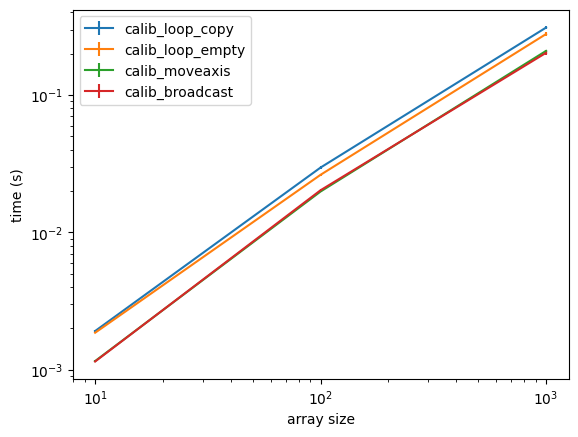

In [14]:
fig, ax = plt.subplots()
for name, arr in res.items():
    arr = np.array(arr)
    ax.errorbar(sizes, arr[:,0], yerr=arr[:,1], label=name)
ax.legend()
ax.set(xlabel="array size", ylabel="time (s)", xscale="log", yscale="log");

In [15]:
shape = (10_000, 256, 256)
ima = np.random.uniform(0, 50, size=shape)
coef = np.random.uniform(0, 50, size=shape[0])

In [16]:
%timeit calib_loop_copy(ima, coef)

825 ms ± 20.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%timeit calib_moveaxis(ima, coef)

526 ms ± 1.92 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%timeit calib_broadcast(ima, coef)

533 ms ± 2.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
